In [1]:
# check if the state space are exactly the same for the single cycle sensitivity experiments
# temporary used for single cycle DA experiment: 06/28/2024

# check if the ICs within the single cycle experiments are the same
# it seems that atmfxxx.nc is not prior, but posterior?

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [50]:
#datahome  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/prior/'
datahome  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/posterior/'

datetime  = '2022070100'
expids    = ['BC0_INF','BC0_NOINF','BC1_INF','BC1_NOINF']

ncfile = []
for exp in expids:
    ncfile.append(os.path.join(datahome,f'{exp}_atmf.nc'))

print(ncfile)

['/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/increment/BC0_INF_atminc.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/increment/BC0_NOINF_atminc.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/increment/BC1_INF_atminc.nc', '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/state_space_inc/increment/BC1_NOINF_atminc.nc']


In [51]:
T={}; HUM={};

for i,exp in enumerate(expids):
    fn = nc.Dataset(ncfile[i])
    lon   = fn.variables['grid_xt'][:]
    lat   = fn.variables['grid_yt'][:]
    pfull = fn.variables['pfull'][:]
    T[exp]   = fn.variables['tmp'][0,:,:,:]    # temperature
    HUM[exp] = fn.variables['spfh'][0,:,:,:]   # specific humidity (kg/kg)
    fn.close()

KeyError: 'grid_xt'

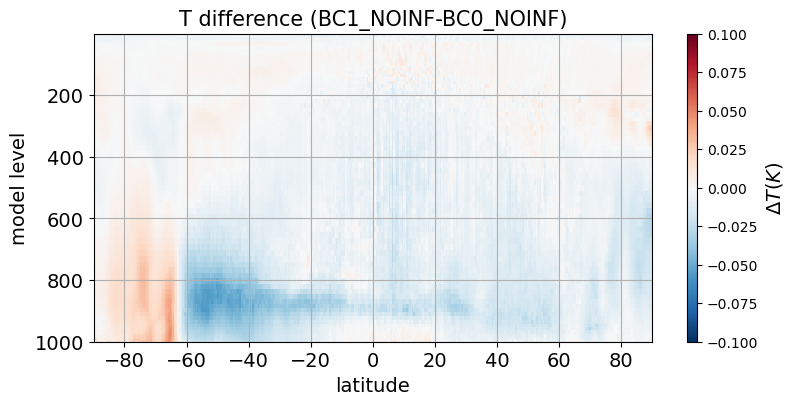

In [49]:
### zonal mean plot
#pltvars = 'HUM'
pltvars = 'T'

exptest = 'BC1_NOINF' 
expref  = 'BC0_NOINF'

if pltvars == 'T':
    plt_levs = np.linspace(1, 1, 21)
elif pltvars == 'HUM':
    plt_levs = np.linspace(-9, 9, 21)*1e-1

zonal_mean_vars = {};

for exp in expids:
    if pltvars == 'T':
        zonal_mean_vars[exp] = np.mean(T[exp],axis=2)
        v_min = -1e-1
        v_max = 1e-1
    elif pltvars == 'HUM':
        zonal_mean_vars[exp] = np.mean(HUM[exp],axis=2)*1e3
        v_min = -1e-1
        v_max =  1e-1
        
lats, levs = np.meshgrid(lat, pfull)

#plt_cont_var = zonal_mean_vars[expref]
plt_cont_var=zonal_mean_vars[exptest]-zonal_mean_vars[expref]

fig, ax = plt.subplots(figsize=(9,4))
contour1=ax.pcolormesh(lats, levs, plt_cont_var, cmap='RdBu_r', vmin=v_min, vmax=v_max)

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('latitude',fontsize=14)
ax.set_ylabel('model level',fontsize=14)
ax.tick_params(axis='x', labelsize=14)  # Set the size to 14 points
ax.tick_params(axis='y', labelsize=14)  # Set the size to 14 points
ax.grid(True)
ax.set_title(f'{pltvars}',fontsize=15)
ax.set_title(f'{pltvars} difference ({exptest}-{expref})',fontsize=15)

cbar = fig.colorbar(contour1,location='right',aspect=30)
if pltvars == 'T':
    cbar.set_label('$\Delta T(K)$', fontsize=14)
elif pltvars == 'HUM':
    cbar.set_label('$\Delta q (g/kg)$', fontsize=14)

#plt.savefig(f'cloud_increment_analysis_{expid1}_{expid2}_{rg}.png', dpi=200, bbox_inches='tight')